# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 10

### Wstęp

Firma produkująca produkty mleczne posiada kilka zamówień do realizacji. Dane są zaprezentowane poniżej.

### Dane

**Ceny składników:**

| Składnik     | Cena (PLN) |
| :---         | ---: |
| Mleko (l)    | 3.5 |
| Cukier (kg)  | 5   |
| Kakao (100g) | 8   |
| Sól (kg)     | 2   |


**Składniki zapisane są w tabeli poniżej:**

| Prod.\Skł.| Mleko (l) | Cukier (kg)  | Kakao (100g) | Sól (kg)    |
| :---      |      ---: |         ---: |         ---: |        ---: |
| Masło     | 5         | 0            | 0            | 0           |
| Czekolada | 1         | 0.1          | 5            | 0.01        |
| Ser żółty | 10        | 0            | 0            | 0.05        |
| Twaróg    | 2         | 0            | 0            | 0.1         |


**Zamówienia klientów:**

| Klient\Prod.| Masło | Czekolada | Ser żółty | Twaróg |
| :---        |  ---: |      ---: |      ---: |   ---: |
| Klient 1    | 10    | 50        | 5         | 5      |
| Klient 2    | 120   | 90        | 15        | 25     |
| Klient 3    | 0     | 10        | 1         | 1      |


> **Uwaga**: Możesz użyć funkcji `plt.table` do wyświetlenia tabeli z wynikami.

> Informacja: Powyższe dane są przykładowe i nie mają przełożenia na faktyczne dane rynkowe.

### Zadanie 1

Korzystając z operacji macierzowych oblicz i odpowiedz na pytania:

#### A) Jaki jest koszt wyprodukowania każdego z produktów?






 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ceny = np.array([3.5, 5, 8, 2])
skladniki = np.array([[5,0,0,0],[1,0.1,5,0.01],[10,0,0,0.05],[2,0,0,0.1]])

In [2]:
koszt = skladniki @ ceny 
row = ['Masło','Czekolada','Ser żółty','Twaróg']
col=[('Koszty(PLN)')]


In [3]:
koszt = koszt.reshape(4,1) 



(0.0, 1.0, 0.0, 1.0)

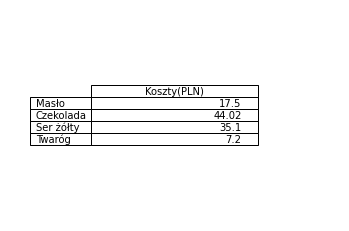

In [4]:
plt.table(cellText=koszt,rowLabels=row, colLabels=col,loc='center',colWidths=[0.5])
plt.axis('off')

#### B) Ile składników zostanie uzytych na realizację zamówień klientów (każdego osobno i łącznie)?




In [5]:
zamowienia = np.array([[10,50,5,5],[120,90,15,25],[0,10,1,1]])


In [6]:
ilosc = zamowienia @ skladniki

In [7]:
ilosc2 = np.vstack((ilosc , np.sum(ilosc, axis=0)))
ilosc2

array([[1.600e+02, 5.000e+00, 2.500e+02, 1.250e+00],
       [8.900e+02, 9.000e+00, 4.500e+02, 4.150e+00],
       [2.200e+01, 1.000e+00, 5.000e+01, 2.500e-01],
       [1.072e+03, 1.500e+01, 7.500e+02, 5.650e+00]])

(0.0, 1.0, 0.0, 1.0)

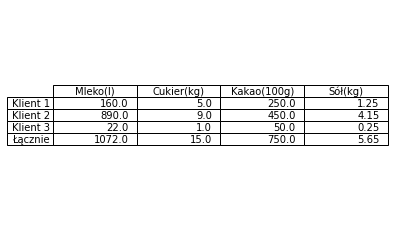

In [8]:
row = ['Klient 1','Klient 2','Klient 3','Łącznie']
col=['Mleko(l)','Cukier(kg)','Kakao(100g)','Sół(kg)']

plt.table(cellText=ilosc2,rowLabels=row, colLabels=col,loc='center')
plt.axis('off')

#### C) Zakładając marżę $30\%$ (pomijając wszystkie inne czynniki), ile klienci będą musieli zapłacić za zrealizowanie zamówienia?



In [9]:
marza = ilosc @ ceny *1.3
marza = marza.reshape(3,1)

(0.0, 1.0, 0.0, 1.0)

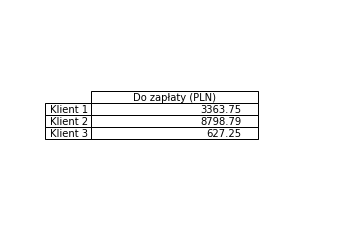

In [10]:
row = ['Klient 1','Klient 2','Klient 3',]
col=['Do zapłaty (PLN)']

plt.table(cellText=marza,rowLabels=row, colLabels=col,loc='center',colWidths=[0.5])
plt.axis('off')

#### D) Jaki jest łączny koszt składników jakie należy zamówić, aby zrealizować wszystkie zamówienia klientów?




In [11]:
ks = np.sum(ilosc @ ceny)
ks = ks.reshape(1,1)

(0.0, 1.0, 0.0, 1.0)

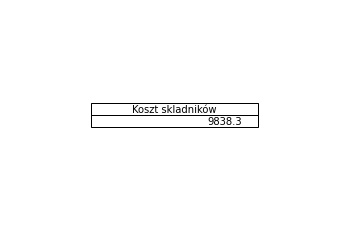

In [12]:
col=['Koszt skladników']

table = plt.table(cellText=ks, colLabels=col,loc='center',colWidths=[0.5])
table.scale(1, 1)
plt.axis('off')

### Zadanie 2

Napisać skrypt, który przyjmuje dwie macierze $A$ oraz $B$, a następnie wypisuje operacje wykonywane przy mnożeniu obu macierzy.

**Przykład:**

Wejście:

\begin{equation}
A = \begin{pmatrix}
1 & 2 & 1\\
4 & 4 & 5\\
6 & 7 & 7
\end{pmatrix}, 
 B = \begin{pmatrix}
-7 & -7 & 6\\
2 & 1 & -1\\
4 & 5 & -4
\end{pmatrix}
\end{equation}

Wyjście:

```
C[0, 0] = 1 * (-7) + 2 * 2 + 1 * 4 = 1
C[0, 1] = 1 * (-7) + 2 * 1 + 1 * 5 = 0
C[0, 2] = 1 * 6 + 2 * (-1) + 1 * (-4) = 0
C[1, 0] = 4 * (-7) + 4 * 2 + 5 * 4 = 0
C[1, 1] = 4 * (-7) + 4 * 1 + 5 * 5 = 1
C[1, 2] = 4 * 6 + 4 * (-1) + 5 * (-4) = 0
C[2, 0] = 6 * (-7) + 7 * 2 + 7 * 4 = 0
C[2, 1] = 6 * (-7) + 7 * 1 + 7 * 5 = 0
C[2, 2] = 6 * 6 + 7 * (-1) + 7 * (-4) = 1

[[1 0 0]
 [0 1 0]
 [0 0 1]]
```



In [13]:
A = np.array([[1,2,1],[4,4,5],[6,7,7]])
B = np.array([[-7,-7,6],[2,1,-1],[4,5,-4]])

In [18]:
for x in range(A.shape[0]):
    for y in range(A.shape[1]):
        sub_a = A[x,]
        sub_b = B[:,y]
        
        print(f'C[{x} {y}] = ', end='')
        print(f'{sub_a[0] if sub_a[0] >=0 else "("+str(sub_a[0])+")" } * ', end='')
        print(f'{sub_b[0] if sub_b[0] >=0 else "("+str(sub_b[0])+")" } + ', end='')
        
        print(f'{sub_a[1] if sub_a[1] >=0 else "("+str(sub_a[1])+")" } * ', end='')
        print(f'{sub_b[1] if sub_b[1] >=0 else "("+str(sub_b[1])+")" } + ', end='')
        
        print(f'{sub_a[2] if sub_a[2] >=0 else "("+str(sub_a[2])+")" } * ', end='')
        print(f'{sub_b[2] if sub_b[2] >=0 else "("+str(sub_b[2])+")" } = ',end='')
        print(f'{sub_b @ sub_a}')
        

print()
print(A@B)


C[0 0] = 1 * (-7) + 2 * 2 + 1 * 4 = 1
C[0 1] = 1 * (-7) + 2 * 1 + 1 * 5 = 0
C[0 2] = 1 * 6 + 2 * (-1) + 1 * (-4) = 0
C[1 0] = 4 * (-7) + 4 * 2 + 5 * 4 = 0
C[1 1] = 4 * (-7) + 4 * 1 + 5 * 5 = 1
C[1 2] = 4 * 6 + 4 * (-1) + 5 * (-4) = 0
C[2 0] = 6 * (-7) + 7 * 2 + 7 * 4 = 0
C[2 1] = 6 * (-7) + 7 * 1 + 7 * 5 = 0
C[2 2] = 6 * 6 + 7 * (-1) + 7 * (-4) = 1

[[1 0 0]
 [0 1 0]
 [0 0 1]]
